In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('/kaggle/input/data-full-p-falciparum/plasmodiumfalciparum_data (1).csv')
data

<ipython-input-3-b938809a86bc>:1: DtypeWarning: Columns (0,1,13,14,16,20,24,26,29,32,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/kaggle/input/data-full-p-falciparum/plasmodiumfalciparum_data (1).csv')
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,31902,[],CHEMBL761156,In vitro antimalarial activity against Plasmod...,F,NaN,NaN,BAO_0000188,BAO_0000218,organism-based format,C[n+]1ccc2c([nH]c3ccccc32)c1-c1ccccc1.Cc1ccc(S...,NaN,NaN,CHEMBL1147489,Bioorg Med Chem Lett,2004.0,NaN,CHEMBL295054,NaN,CHEMBL1183400,4.89,0,http://www.openphacts.org/units/Nanomolar,76153,=,1,1,=,NaN,EC50,nM,NaN,13000.00,CHEMBL364,Plasmodium falciparum,Plasmodium falciparum,5833,NaN,NaN,EC50,M,UO_0000065,NaN,0.000013
1,NaN,NaN,32325,[],CHEMBL764090,Growth inhibition of chloroquine-resistant Pla...,F,NaN,NaN,BAO_0000190,BAO_0000218,organism-based format,NaN,NaN,NaN,CHEMBL1134883,Bioorg Med Chem Lett,2002.0,NaN,CHEMBL76383,1-(2-Hydroxyphenyl)-3-ferrocenyl-2-propen-1-one,CHEMBL76383,4.13,0,http://www.openphacts.org/units/Nanomolar,133131,=,1,1,=,NaN,IC50,nM,NaN,73500.00,CHEMBL364,Plasmodium falciparum,Plasmodium falciparum,5833,NaN,NaN,IC50,uM,UO_0000065,NaN,73.500000
2,NaN,NaN,32480,[],CHEMBL760652,In vitro antimalarial activity against Plasmod...,F,NaN,NaN,BAO_0000190,BAO_0000218,organism-based format,C[C@H]1[C@@H](OCCC2ON2C(=O)c2ccccc2O)O[C@@H]2O...,NaN,NaN,CHEMBL1128412,J Med Chem,1995.0,NaN,CHEMBL77052,NaN,CHEMBL77052,8.37,0,http://www.openphacts.org/units/Nanomolar,134429,=,1,1,=,NaN,IC50,nM,NaN,4.25,CHEMBL364,Plasmodium falciparum,Plasmodium falciparum,5833,NaN,NaN,IC50,nM,UO_0000065,NaN,4.250000
3,NaN,NaN,33480,[],CHEMBL764090,Growth inhibition of chloroquine-resistant Pla...,F,NaN,NaN,BAO_0000190,BAO_0000218,organism-based format,NaN,NaN,NaN,CHEMBL1134883,Bioorg Med Chem Lett,2002.0,NaN,CHEMBL312787,"1-(2,3,4-Trimethoxyphenyl)-3-ferrocenyl-2-prop...",CHEMBL312787,4.65,0,http://www.openphacts.org/units/Nanomolar,133130,=,1,1,=,NaN,IC50,nM,NaN,22500.00,CHEMBL364,Plasmodium falciparum,Plasmodium falciparum,5833,NaN,NaN,IC50,uM,UO_0000065,NaN,22.500000
4,NaN,NaN,34739,[],CHEMBL764090,Growth inhibition of chloroquine-resistant Pla...,F,NaN,NaN,BAO_0000190,BAO_0000218,organism-based format,NaN,Outside typical range,Values for this activity type are unusually la...,CHEMBL1134883,Bioorg Med Chem Lett,2002.0,NaN,CHEMBL74819,1-(4-Ethoxyphenyl)-3-ferrocenyl-2-propen-1-one,CHEMBL74819,NaN,0,http://www.openphacts.org/units/Nanomolar,133129,=,1,1,=,NaN,IC50,nM,NaN,200000.00,CHEMBL364,Plasmodium falciparum,Plasmodium falciparum,5833,NaN,NaN,IC50,uM,UO_0000065,NaN,200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969214,NaN,NaN,25730828,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393228,Antimalarial activity against Plasmodium falci...,F,NaN,NaN,BAO_0000096,BAO_0000218,organism-based format,COc1ccc(CN2CCN(c3ccncc3C)CC2)cc1Cn1cccn1,NaN,NaN,CHEMBL5390311,ACS Med Chem Lett,2023.0,NaN,CHEMBL4982291,NaN,CHEMBL4982291,NaN,0,http://qudt.org/vocab/unit#Percent,4012825,=,1,0,=,NaN,GI,%,NaN,-15.00,CHEMBL364,Plasmodium falciparum,Plasmodium falciparum,5833,NaN,NaN,GI,%,UO_0000187,NaN,-15.000000
969215,NaN,NaN,25730829,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393228,Antimalarial activity against Plasmodium falci...,F,NaN,NaN,BAO_0000096,BAO_0000218,organism-based format,OC1(CCCNC2CCN(C3CC3)C(c3ccccc3)C2)CCC1,NaN,NaN,CHEMBL5390311,ACS Med Chem Lett,2023.0,

In [19]:
jumlah_duplikat = data.duplicated().sum()
print("Jumlah data duplikat:", jumlah_duplikat)

Jumlah data duplikat: 0


In [5]:
data_filter = data[['canonical_smiles','standard_relation','standard_type','standard_units','standard_value']]
data_filter

,canonical_smiles,standard_relation,standard_type,standard_units,standard_value
0,C[n+]1ccc2c([nH]c3ccccc32)c1-c1ccccc1.Cc1ccc(S...,=,EC50,nM,13000.00
1,NaN,=,IC50,nM,73500.00
2,C[C@H]1[C@@H](OCCC2ON2C(=O)c2ccccc2O)O[C@@H]2O...,=,IC50,nM,4.25
3,NaN,=,IC50,nM,22500.00
4,NaN,=,IC50,nM,200000.00
...,...,...,...,...,...
969214,COc1ccc(CN2CCN(c3ccncc3C)CC2)cc1Cn1cccn1,=,GI,%,-15.00
969215,OC1(CCCNC2CCN(C3CC3)C(c3ccccc3)C2)CCC1,=,GI,%,-8.00
969216,Oc1cc(CN2CCC(O)(Cn3ccnc3)CC2)nc2c(Cl)cccc12,=,XC50,nM,882.00
969217,COc1c(C2CCN(CCN3CCC(CNC(=O)c4ccc(-c5ccc(C#N)cc...,=,XC50,nM,445.00


In [6]:
data_filter['standard_type'].unique()

array(['EC50', 'IC50', 'ED50', 'IC90', 'Inhibition', 'NT',
       'Relative activity', 'FIC', 'Suppression', 'Activity', 'NI', 'MIC',
       'IC10', 'Inhibitory ratio', 'Protein', 'Nucleic acids',
       'Glutathione', 'GR activity', 'Ratio', 'Accumulation coefficient',
       'Reversal', nan, 'Effective concentration', 'Safety ratio', 'Km',
       'Vrel', 'Ki', 'Vm', 'PGI', 'IA', 'IC99', 'Log RA', 'IS',
       'Cytoplasmic vacuolization', 'IC50 ratio', 'Index', 'Growth',
       'ID50', 'Parasitemia', 'Resistance index', 'EC90',
       'Vascular accumulation ratio', 'Ratio IC50', 'MIC90', 'IC60',
       'Survival', 'LD50', 'T1/2', 'DC50', '%max', 'XC50', 'FC', 'IC80',
       'Ratio EC50', 'GI', 'TIME', 'pIC25', 'FIC50', 'FICI', 'ID90', 'Cp',
       'ED90', 'Potency', 'permeability', 'Drug uptake', 'ED99', 'GI50',
       'INH', 'logIC50', 'IC100', 'AbsAC35', 'IC95', 'CD90', 'CI',
       'Growth Inhibition', 'MIC50', 'log(ratio)', 'log(activity)',
       'AUCED90', 'MIC>99', 'T99.9%', 'f

In [7]:
data_filter['standard_relation'].unique()

array(['=', '>', nan, '<', '~', '>=', '<='], dtype=object)

In [8]:
data_filter['standard_units'].unique()

array(['nM', 'mg.kg-1', 'ug.mL-1', 'ug well-1', '%', nan, 'uM', 'mg ml-1',
       'ug ml-1', 'mg kg-1 4day-1', 'ng ml-1', 'mg mg-1', 'nM mg-1',
       'mU mg-1', 'uM ml-1', 'uM well-1', '(mg/kg)/day', 'umol.kg-1',
       'uM.hr', 'day', 'ng/ml', 'hr', 'ug', 'nM/g', 'mg Kg-1', 'mg kg-1',
       'mg/kg/day', "10'-4g/L", "10'-3g/L", "10'-5g/L", 'fg', 'ppm',
       'ug.hr/ml/day', 'microg.hr/mL', 'ug.hr/ml', 'uM.hr/day',
       'ng.hr.mL-1', '10^-2microM', 'mm', 'nmol/L', 'mg/cm3',
       'microg/cm3', '10^-5 uM'], dtype=object)

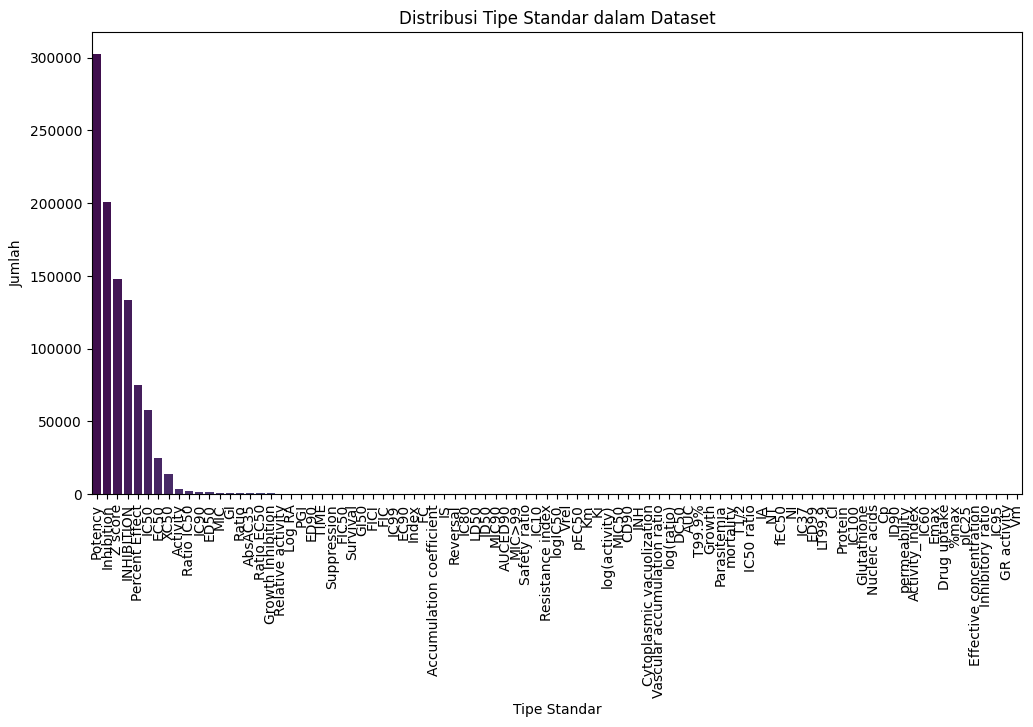

In [9]:
standard_type_counts = data['standard_type'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=standard_type_counts.index, y=standard_type_counts.values, palette="viridis")

plt.xticks(rotation=90)
plt.xlabel("Tipe Standar")
plt.ylabel("Jumlah")
plt.title("Distribusi Tipe Standar dalam Dataset")
plt.show()

In [10]:
standard_type_counts['IC50']

57490

In [11]:
data_ic50 =  data_filter[data_filter['standard_type']=='IC50']
data_ic50

,canonical_smiles,standard_relation,standard_type,standard_units,standard_value
1,NaN,=,IC50,nM,73500.00
2,C[C@H]1[C@@H](OCCC2ON2C(=O)c2ccccc2O)O[C@@H]2O...,=,IC50,nM,4.25
3,NaN,=,IC50,nM,22500.00
4,NaN,=,IC50,nM,200000.00
5,Oc1cccc(O)c1O,=,IC50,nM,5660.00
...,...,...,...,...,...
969209,CC1(N2CCC2)CCC(NCC2CCN(Cc3ccccc3)C2)CC1,=,IC50,nM,1500.00
969210,O=C(NC1CCN(CCOc2ccc(Cl)cc2)CC1)c1c[nH]c2ccncc2...,=,IC50,nM,2000.00
969211,COc1ccc(-c2cncc(C(=O)NCC3CCN(CCN(C)C)CC3)c2)cc1,=,IC50,nM,2700.00
969212,Cc1c(CN2CCC(O)(Cn3ccnc3)CC2)[nH]c2c(Cl)cccc12,=,IC50,nM,3600.00


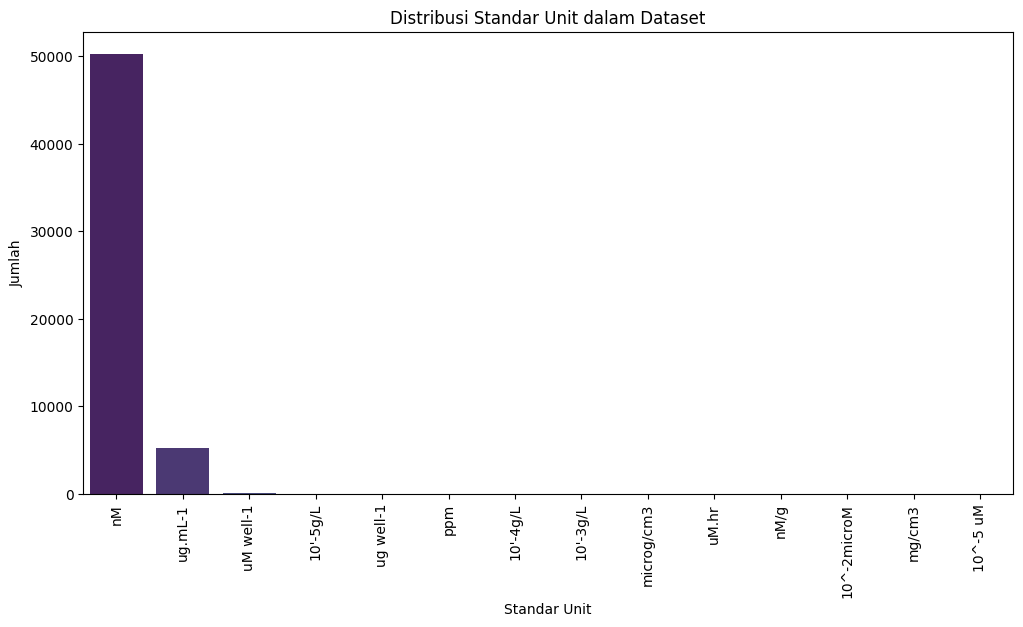

In [12]:
standard_type_counts = data_ic50['standard_units'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=standard_type_counts.index, y=standard_type_counts.values, palette="viridis")

plt.xticks(rotation=90)
plt.xlabel("Standar Unit")
plt.ylabel("Jumlah")
plt.title("Distribusi Standar Unit dalam Dataset")
plt.show()

In [13]:
data_ic50_nm = data_ic50[data_ic50['standard_units']=='nM']
data_ic50_nm

,canonical_smiles,standard_relation,standard_type,standard_units,standard_value
1,NaN,=,IC50,nM,73500.00
2,C[C@H]1[C@@H](OCCC2ON2C(=O)c2ccccc2O)O[C@@H]2O...,=,IC50,nM,4.25
3,NaN,=,IC50,nM,22500.00
4,NaN,=,IC50,nM,200000.00
5,Oc1cccc(O)c1O,=,IC50,nM,5660.00
...,...,...,...,...,...
969209,CC1(N2CCC2)CCC(NCC2CCN(Cc3ccccc3)C2)CC1,=,IC50,nM,1500.00
969210,O=C(NC1CCN(CCOc2ccc(Cl)cc2)CC1)c1c[nH]c2ccncc2...,=,IC50,nM,2000.00
969211,COc1ccc(-c2cncc(C(=O)NCC3CCN(CCN(C)C)CC3)c2)cc1,=,IC50,nM,2700.00
969212,Cc1c(CN2CCC(O)(Cn3ccnc3)CC2)[nH]c2c(Cl)cccc12,=,IC50,nM,3600.00


standard_relation
=     45314
>      4641
<       139
>=       40
~        20
<=       12
Name: count, dtype: int64


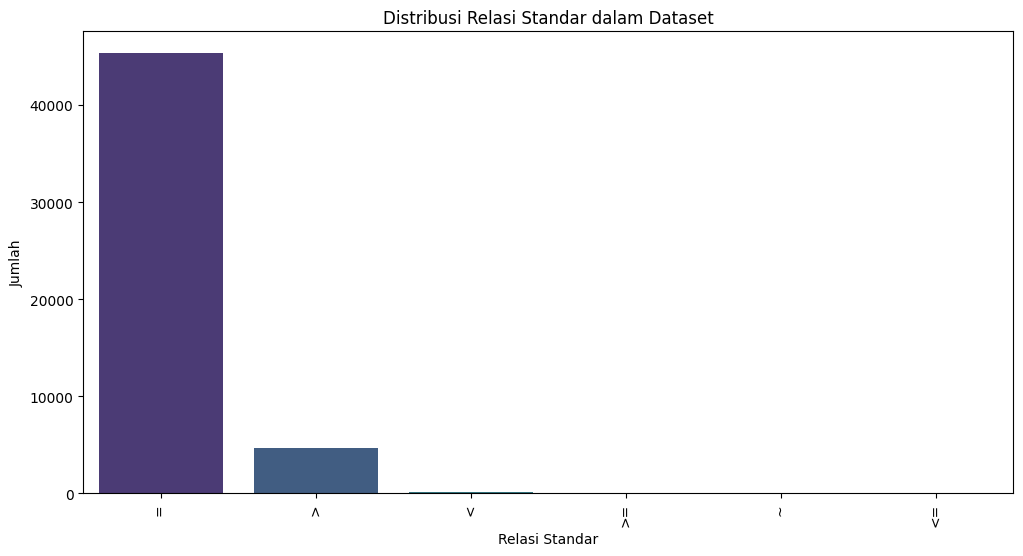

In [14]:
standard_type_counts = data_ic50_nm['standard_relation'].value_counts()
print(standard_type_counts)
plt.figure(figsize=(12, 6))
sns.barplot(x=standard_type_counts.index, y=standard_type_counts.values, palette="viridis")

plt.xticks(rotation=90)
plt.xlabel("Relasi Standar")
plt.ylabel("Jumlah")
plt.title("Distribusi Relasi Standar dalam Dataset")
plt.show()

In [15]:
data_ic50_eq= data_ic50_nm[data_ic50_nm['standard_relation']=='=']
data_ic50_eq

,canonical_smiles,standard_relation,standard_type,standard_units,standard_value
1,NaN,=,IC50,nM,73500.00
2,C[C@H]1[C@@H](OCCC2ON2C(=O)c2ccccc2O)O[C@@H]2O...,=,IC50,nM,4.25
3,NaN,=,IC50,nM,22500.00
4,NaN,=,IC50,nM,200000.00
5,Oc1cccc(O)c1O,=,IC50,nM,5660.00
...,...,...,...,...,...
969209,CC1(N2CCC2)CCC(NCC2CCN(Cc3ccccc3)C2)CC1,=,IC50,nM,1500.00
969210,O=C(NC1CCN(CCOc2ccc(Cl)cc2)CC1)c1c[nH]c2ccncc2...,=,IC50,nM,2000.00
969211,COc1ccc(-c2cncc(C(=O)NCC3CCN(CCN(C)C)CC3)c2)cc1,=,IC50,nM,2700.00
969212,Cc1c(CN2CCC(O)(Cn3ccnc3)CC2)[nH]c2c(Cl)cccc12,=,IC50,nM,3600.00


In [16]:
data_ic50_eq.isnull().sum()

canonical_smiles     82
standard_relation     0
standard_type         0
standard_units        0
standard_value        1
dtype: int64

In [17]:
final_data =  data_ic50_eq.dropna()
print(final_data.isnull().sum())

canonical_smiles     0
standard_relation    0
standard_type        0
standard_units       0
standard_value       0
dtype: int64


In [18]:
final_data.to_csv('data_ready_eda.csv')